# Getting Started:

### Identiyfing the factors affecting the % of Children wasted and % of Underweight Children using features related to Mothers and Girls
### through NHFS Data

Children Wasted:

According to [WHO](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/302) , Child wasting refers to a child who is too thin for his or her height and is the result of recent rapid weight loss or the failure to gain weight. A child who is moderately or severely wasted has an increased risk of death, but treatment is possible. Child wasting is one of the World Health Assembly nutrition target indicators. 

[WHO](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/27)
defines prevalence of underweight (weight-for-age <-2 standard deviation from the median of the World Health Organization (WHO) Child Growth Standards) among children under 5 years of age.



## Importing the libraries and Datasets

In [14]:
# Array and Dataframe Operations:
import numpy as np
import pandas as pd

# Data Visualization:
import seaborn as sns
from matplotlib import pyplot as plt

# Models:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Data Engineering and Preprocessing:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Metrics:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


In [15]:
import nbformat

notebook_path = 'Child_underwt.ipynb'

try:
    # Read the notebook
    with open(notebook_path, 'r', encoding='utf-8') as f:
        notebook = nbformat.read(f, as_version=4)

    # Write the notebook back (this will re-format it correctly)
    with open(notebook_path, 'w', encoding='utf-8') as f:
        nbformat.write(notebook, f)
    print(f"Notebook {notebook_path} has been successfully validated and fixed.")
except Exception as e:
    print(f"An error occurred: {e}")


Notebook Child_underwt.ipynb has been successfully validated and fixed.


In [16]:
childdf = pd.read_csv("C:\\Users\\mehul\\MyLab\\NHFS Research\\Python Notebooks\\childdf.csv")
femaledf = pd.read_csv("C:\\Users\\mehul\\MyLab\\NHFS Research\\Python Notebooks\\femaledf.csv")

In [17]:
childdf.head()

,"Total children age 6-23 months receiving an adequate diet16, 17 (%)",Children under 5 years who are stunted (height-for-age)18 (%),Children under 5 years who are wasted (weight-for-height)18 (%),Children under 5 years who are severely wasted (weight-for-height)19 (%),Children under 5 years who are underweight (weight-for-age)18 (%),Children under 5 years who are overweight (weight-for-height)20 (%),Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%),Children Prevalence of symptoms of acute respiratory infection (ARI) in the 2 weeks preceding the survey (Children under age 5 years) (%),Prevalence of diarrhoea in the 2 weeks preceding the survey (Children under age 5 years) (%)
0,18.7,21.6,15.7,24.6,24.6,1.5,37.7,1.8,5.7
1,5.9,27.0,27.0,42.8,42.8,0.8,30.4,7.0,4.5
2,23.5,21.1,12.6,17.4,17.4,7.2,43.4,0.0,6.0
3,16.1,19.7,19.5,21.4,21.4,4.5,59.6,1.3,11.9
4,1.8,36.4,19.2,32.2,32.2,4.7,66.7,1.4,7.5


In [18]:
childdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 9 columns):
 #   Column                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                      --------------  -----  
 0   Total children age 6-23 months receiving an adequate diet16, 17  (%)                                                                        706 non-null    float64
 1   Children under 5 years who are stunted (height-for-age)18 (%)                                                                               707 non-null    float64
 2   Children under 5 years who are wasted (weight-for-height)18 (%)                                                                             707 non-null    float64
 3   Children under 5 years who are severely wasted

In [19]:
target = childdf.iloc[:,3:5]

In [20]:
target.head()

,Children under 5 years who are severely wasted (weight-for-height)19 (%),Children under 5 years who are underweight (weight-for-age)18 (%)
0,24.6,24.6
1,42.8,42.8
2,17.4,17.4
3,21.4,21.4
4,32.2,32.2


In [21]:
femaledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 47 columns):
 #   Column                                                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                                                          --------------  -----  
 0   District Names                                                                                                                                                                  707 non-null    object 
 1   State/UT                                                                                                                                                                        707 non-null    object 
 2   Female_school ever %                                                  

In [22]:
l1 = []
for i in femaledf.columns:
    l1.append(i)
print(l1)

['District Names', 'State/UT', 'Female_school ever %', 'population % electricity', 'drinking water %', 'sanitation %', 'clean fuel %', 'iodized salt %', 'Health insurance/finance scheme %', 'Women literacy %', 'Women (age 15-49)  with 10 or more years of schooling (%)', 'women child marriage %', 'Births in the 5 years preceding the survey that are third or higher order (%)', 'Women menstural hygiene', 'Family planning methods %', 'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Any modern method6 (%)', 'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Female sterilization (%)', 'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - IUD/PPIUD (%)', 'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Pill (%)', 'Total Unmet need for Family Planning (Currently Married Women Age 15-49  years)7 (%)', 'Unmet need for spacing (Currently Married Women Age 15-49 

In [23]:
features = femaledf[['Female_school ever %','sanitation %','women child marriage %','Women menstural hygiene','Mothers who consumed iron folic acid for 180 days or more when they were pregnant (for last birth in the 5 years before the survey} (%)','Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)','Anaemic women %','Women age 15 years and above wih Elevated blood pressure (Systolic ?140 mm of Hg and/or Diastolic ?90 mm of Hg) or taking medicine to control blood pressure (%)','Births in the 5 years preceding the survey that are third or higher order (%)','Average out-of-pocket expenditure per delivery in a public health facility (for last birth in the 5 years before the survey) (Rs.)','Non-pregnant women age 15-49 years who are anaemic (<12.0 g/dl)22 (%)','All women age 15-19 years who are anaemic22 (%) ','Women Alcohol %','Women age 15 years and above who use any kind of tobacco (%)']]

In [24]:
features.head()

,Female_school ever %,sanitation %,women child marriage %,Women menstural hygiene,Mothers who consumed iron folic acid for 180 days or more when they were pregnant (for last birth in the 5 years before the survey} (%),Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%),Anaemic women %,Women age 15 years and above wih Elevated blood pressure (Systolic ?140 mm of Hg and/or Diastolic ?90 mm of Hg) or taking medicine to control blood pressure (%),Births in the 5 years preceding the survey that are third or higher order (%),Average out-of-pocket expenditure per delivery in a public health facility (for last birth in the 5 years before the survey) (Rs.),Non-pregnant women age 15-49 years who are anaemic (<12.0 g/dl)22 (%),All women age 15-19 years who are anaemic22 (%),Women Alcohol %,Women age 15 years and above who use any kind of tobacco (%)
0,78.0,83.5,11.4,100.0,43.9,8.2,38.3,35.4,0.0,2278.0,38.4,48.0,29.6,63.5
1,82.7,86.4,15.4,100.0,24.1,8.6,62.1,27.4,1.5,1904.0,62.5,47.8,5.1,46.8
2,84.7,89.3,17.1,98.2,61.9,10.0,57.7,23.0,0.5,3460.0,57.6,43.2,1.7,19.6
3,60.0,71.6,25.4,78.0,35.3,13.8,62.6,22.1,0.0,3479.0,62.8,59.2,0.6,7.1
4,56.0,61.7,33.7,72.5,32.4,16.9,64.0,25.2,2.2,1931.0,64.6,73.9,0.8,11.4


# Data Preprocessing


### Imputing the NaN values:

In [25]:
imputer = SimpleImputer(strategy='mean')
target_imp = pd.DataFrame(imputer.fit_transform(target), columns=target.columns)

features_imp = pd.DataFrame(imputer.fit_transform(features), columns= features.columns)

## Target1 : Severly Wasted %

### Scaling the data:

Robust Scaler : transform data and make it immune to outliers (But can have negative values).


In [26]:
robust = RobustScaler()
X = pd.DataFrame(robust.fit_transform(features_imp))
y1 = pd.DataFrame(robust.fit_transform(pd.DataFrame(target_imp.iloc[:,0])))

In [38]:
target_imp

,Children under 5 years who are severely wasted (weight-for-height)19 (%),Children under 5 years who are underweight (weight-for-age)18 (%)
0,24.6,24.6
1,42.8,42.8
2,17.4,17.4
3,21.4,21.4
4,32.2,32.2
...,...,...
702,32.2,32.2
703,40.0,40.0
704,30.6,30.6
705,41.0,41.0


In [28]:
# Train test Split:

X_train,X_test,y_train1,y_test1 = train_test_split(X,y1,test_size=0.2,random_state=2)

In [29]:
target_columns = list(target.columns)
target_columns


['Children under 5 years who are severely wasted (weight-for-height)19 (%)',
 'Children under 5 years who are underweight (weight-for-age)18 (%)']

In [30]:
# Renaming the columns of scaled Dfs:

X_train.columns = features.columns
X_test.columns = features.columns

y_train1.rename(columns={0:'Children under 5 years who are severely wasted (weight-for-height)19 (%)'})
y_test1.rename(columns = {0:'Children under 5 years who are severely wasted (weight-for-height)19 (%)'})

,Children under 5 years who are severely wasted (weight-for-height)19 (%)
107,-0.621908
399,-0.961131
221,-0.579505
37,0.424028
524,-0.996466
...,...
13,1.194346
634,0.607774
633,0.876325
40,0.353357


### Model Training and Testing:


In [31]:
# Gradient Boosting Regressor:
gbm = GradientBoostingRegressor()
gbm.fit(X_train,y_train1)
y_pred1 = gbm.predict(X_test)
print(f"{r2_score(y_test1,y_pred1)} GBM")

# Random Forest Regressor:
rf = RandomForestRegressor()
rf.fit(X_train,y_train1)
y_pred1 = rf.predict(X_test)
print(f"{r2_score(y_test1,y_pred1)} RF")

c:\Users\mehul\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6078693124173512 GBM


C:\Users\mehul\AppData\Local\Temp\ipykernel_16784\1571587379.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train1)


0.5984252114277079 RF


In [32]:

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Display feature importances
print(feature_importances)

Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)                                                                         0.543590
sanitation %                                                                                                                                                        0.094712
Women menstural hygiene                                                                                                                                             0.064103
Average out-of-pocket expenditure per delivery in a public health facility (for last birth in the 5 years before the survey) (Rs.)                                  0.047269
Women age 15 years and above who use any kind of tobacco (%)                                                                                                        0.032192
Mothers who consumed iron folic acid for 180 days or more when they were pregnant (for last birth in the 5 years before the survey} (%)

### Conclusion:

### from the above results, we can conclude that the most correlated factor for Child wasted occurence percentage in children is the percentage of below normal BMI in Women.

## Target2: Underweight %

In [33]:
robust = RobustScaler()
X = pd.DataFrame(robust.fit_transform(features_imp))
y2 = pd.DataFrame(robust.fit_transform(pd.DataFrame(target_imp.iloc[:,1])))

In [34]:
# Train test Split:

X_train,X_test,y_train2,y_test2 = train_test_split(X,y2,test_size=0.2,random_state=2)

In [35]:
# Renaming the columns of scaled Dfs:

X_train.columns = features.columns
X_test.columns = features.columns

y_train1.rename(columns={1:'Children under 5 years who are underweight (weight-for-age)18 (%)'})
y_test1.rename(columns = {1:'Children under 5 years who are underweight (weight-for-age)18 (%)'})

,0
107,-0.621908
399,-0.961131
221,-0.579505
37,0.424028
524,-0.996466
...,...
13,1.194346
634,0.607774
633,0.876325
40,0.353357


### Model Training and Testing:


In [36]:
# Gradient Boosting Regressor:
gbm = GradientBoostingRegressor()
gbm.fit(X_train,y_train2)
y_pred2 = gbm.predict(X_test)
print(f"{r2_score(y_test2,y_pred2)} GBM")

# Random Forest Regressor:
rf = RandomForestRegressor()
rf.fit(X_train,y_train2)
y_pred2 = rf.predict(X_test)
print(f"{r2_score(y_test2,y_pred2)} RF")

c:\Users\mehul\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6030265364711478 GBM


C:\Users\mehul\AppData\Local\Temp\ipykernel_16784\1011858981.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train2)


0.6129604445292061 RF


In [37]:

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Display feature importances
print(feature_importances)

Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)                                                                         0.542868
sanitation %                                                                                                                                                        0.093563
Women menstural hygiene                                                                                                                                             0.070026
Average out-of-pocket expenditure per delivery in a public health facility (for last birth in the 5 years before the survey) (Rs.)                                  0.044259
Women age 15 years and above who use any kind of tobacco (%)                                                                                                        0.033159
Mothers who consumed iron folic acid for 180 days or more when they were pregnant (for last birth in the 5 years before the survey} (%)

### Conclusion:

### from the above results, we can conclude that the for the Below Average BMI is the inly factor highly correlated to Underweightedness in Children

# Some Visualizations:

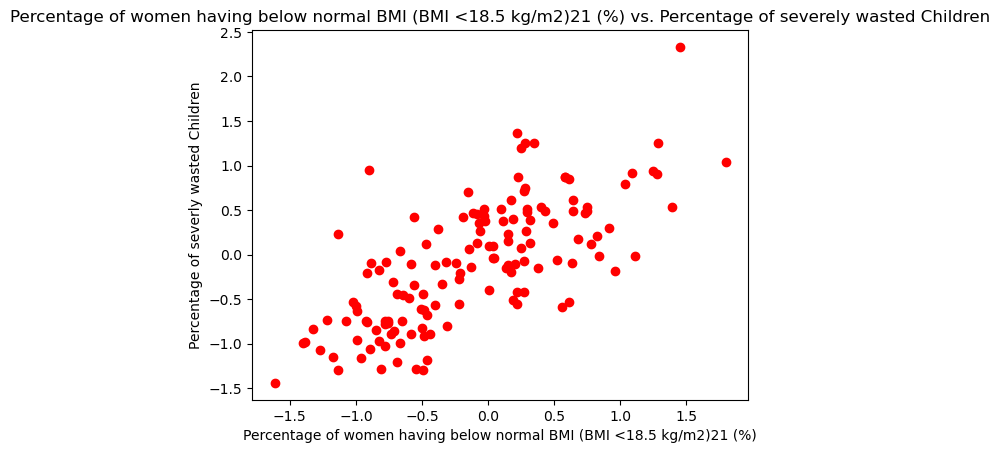

In [49]:
plt.scatter(X_test["Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)"],y_test1, color = "red")
plt.xlabel("Percentage of women having below normal BMI (BMI <18.5 kg/m2)21 (%)")
plt.ylabel("Percentage of severly wasted Children")
plt.title("Percentage of women having below normal BMI (BMI <18.5 kg/m2)21 (%) vs. Percentage of severely wasted Children")
plt.show()


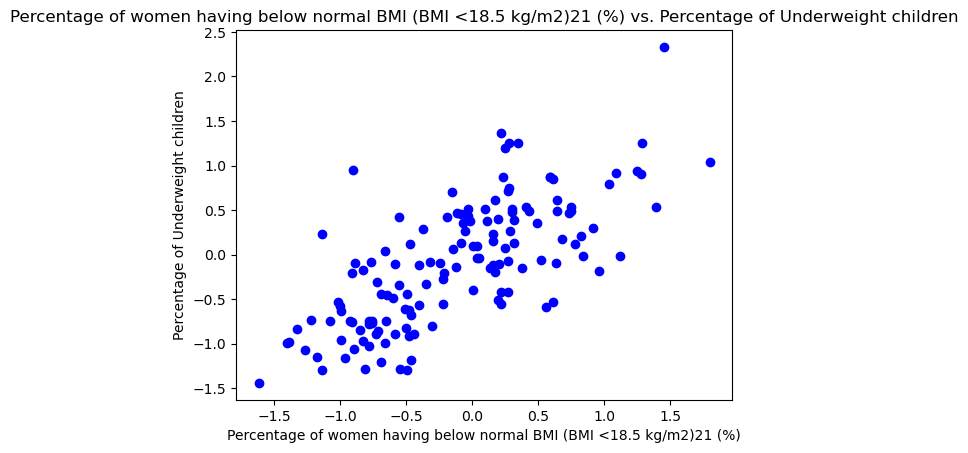

In [50]:
plt.scatter(X_test["Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)"],y_test2, color = "blue")
plt.xlabel("Percentage of women having below normal BMI (BMI <18.5 kg/m2)21 (%)")
plt.ylabel("Percentage of Underweight children")
plt.title("Percentage of women having below normal BMI (BMI <18.5 kg/m2)21 (%) vs. Percentage of Underweight children")
plt.show()